# 1. Setup

## 1.1. Multivariate

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
r1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
r2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def getSensitivityMatrixMultivariate(sensitivity_link, dataset = "BME", k = 1):
    M = np.zeros((10, 10))
    with open(sensitivity_link, 'r') as file:
        for line in file:
            line = line.strip()
            pattern = r"{dataset}\((\d+)\)".format(dataset = dataset)
            match = re.search(pattern, line)
            if match:
                number = int(match.group(1))
            else:
                number = -1
            if number == k:
                words = line.split("&")
                for i in range(1, len(words)):
                    pattern = r"\(([^;]+);([^)]+)\)\s+([0-9.]+)"
                    string = words[i].strip()
                    matches = re.match(pattern, string)
                    num1 = int(float(matches.group(1))*10) - 1
                    num2 = int(float(matches.group(2))*10) - 1
                    num3 = float(matches.group(3))
                    # row index is ratio, column index is sub_ratio
                    M[num1][num2] = num3
            else:
                continue
    return M
def getSensitivityExperimentMultivariateResultK(sensitivity_link='Results/finals/sensitivityBME copy.txt', ratio = True, value = 0, dataset="BME", multi_plot=False, axs=None, row=None, col=None):
    # ratio = true means the width of the diagonal line
    # ratio = false means the length of the subsequence 
    # value: the row/ column index that indicate the value of ratio (0=0.1, 1=0.2)
    if ratio == True:
        if multi_plot:
            for k in range(1, 14, 2):
                M = getSensitivityMatrixMultivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
                axs[row, col].plot(r1, M[value], linestyle='-', label=f"{k}NN")
                axs[row, col].set_title(f"Ratio={(value + 1)/10}")
            axs[row, col].grid(True)
            axs[row, col].legend()
        else:
            plt.figure(figsize=(6, 4))
            for k in range(1, 14, 2):
                M = getSensitivityMatrixMultivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
                plt.plot(r1, M[value], linestyle='-', label=f"{k}NN")
            # plt.title(f'Sensitivity Experiment With Ratio={(value + 1)/10}')
            plt.xlabel('r_2')
            plt.ylabel('Accuracy (%)')
            plt.grid(True)
            plt.legend()
            plt.show()
    if ratio == False:
        if multi_plot:
            for k in range(1, 14, 2):
                M = getSensitivityMatrixMultivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
                data = [experiment[value] for experiment in M]
                axs[row, col].plot(r2, data, linestyle='-', label=f"{k}NN")
                axs[row, col].set_xlabel(r"$r_1$")
                axs[row, col].set_ylabel('Accuracy (%)')
                # axs[row, col].set_title(f"Sub-Ratio={(value + 1)/10}")
            # axs[row, col].grid(True)
            axs[row, col].legend()
        else:
            plt.figure(figsize=(6, 4))
            for k in range(1, 6, 2):
                M = getSensitivityMatrixMultivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
                data = [row[value] for row in M]
                plt.plot(r2, data, linestyle='-', label=f"{k}NN")
            # plt.title(f'Sensitivity Experiment With Sub-Ratio={(value + 1)/10}')
            plt.xlabel(r"$r_1$")
            plt.ylabel('Accuracy (%)')
            plt.grid(True)
            plt.legend()
            plt.show()

In [2]:
def draw_multiple_sensitivity_matrices(sensitivity_link='Results/finals/sensitivityBME copy.txt', ratio = True, dataset="BME", range=range(0, 10)):
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))
    for i in range:
        row = (i) // 4
        col = (i) % 4
        getSensitivityExperimentMultivariateResultK(ratio = ratio, value=i, sensitivity_link=sensitivity_link, dataset=dataset, multi_plot=True, axs=axs, row=row, col=col)

## 1.2. Univariate

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
r = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def getSensitivityMatrixUnivariate(sensitivity_link, dataset = "BME", k = 1):
    M = np.zeros(10)
    with open(sensitivity_link, 'r') as file:
        for line in file:
            line = line.strip()
            pattern = r"{dataset}\((\d+)\)".format(dataset = dataset)
            match = re.search(pattern, line)
            if match:
                number = int(match.group(1))
            else:
                number = -1
            if number == k:
                words = line.split("&")
                for i in range(1, len(words)):
                    string = words[i].strip()
                    pattern = r"\((\d+(\.\d+)?)\)(?:\\)?\s(\d+(\.\d+)?)"
                    matches = re.search(pattern, string)
                    num1 = int(float(matches.group(1))*10) - 1
                    num2 = float(matches.group(3))
                    # row index is ratio, column index is sub_ratio
                    M[num1] = num2
            else:
                continue
    return M
def getSensitivityExperimentUnivariateResultK(sensitivity_link='Results/finals/sensitivityBME copy.txt', value = 0, dataset="BME", multi_plot=False, axs=None, row=None, col=None, x_label=r"$r_1$"):
    # ratio = true means the width of the diagonal line
    # ratio = false means the length of the subsequence 
    # value: the row/ column index that indicate the value of ratio (0=0.1, 1=0.2)
    if multi_plot:
        for k in range(1, 14, 2):
            M = getSensitivityMatrixMultivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
            data = [experiment[value] for experiment in M]
            axs[row, col].plot(r2, data, linestyle='-', label=f"{k}NN")
            axs[row, col].set_xlabel(r"$r_1$")
            axs[row, col].set_ylabel('Accuracy (%)')
            # axs[row, col].set_title(f"Sub-Ratio={(value + 1)/10}")
        # axs[row, col].grid(True)
        axs[row, col].legend()
    else:
        plt.figure(figsize=(6, 4))
        for k in range(1, 6, 2):
            M = getSensitivityMatrixUnivariate(sensitivity_link=sensitivity_link, k=k, dataset=dataset)
            plt.plot(r2, M, linestyle='-', label=f"{k}NN")
        # plt.title(f'Sensitivity Experiment With Sub-Ratio={(value + 1)/10}')
        plt.xlabel(x_label)
        plt.ylabel('Accuracy (%)')
        plt.grid(True)
        plt.legend()
        plt.show()

# 2. Result

## 2.1. MOT

### 2.1.1. Linear Mask

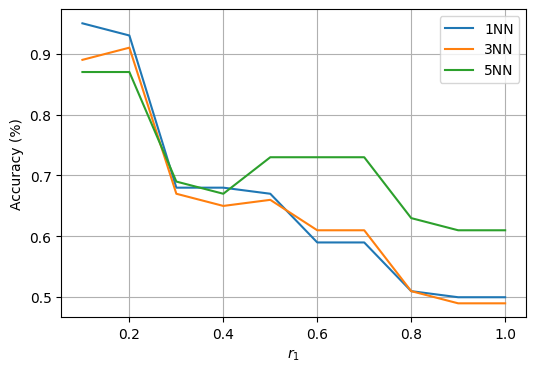

In [87]:
getSensitivityExperimentUnivariateResultK(
    sensitivity_link="../Results/Sensitivity/MLOT.txt",
    dataset="BME"
)

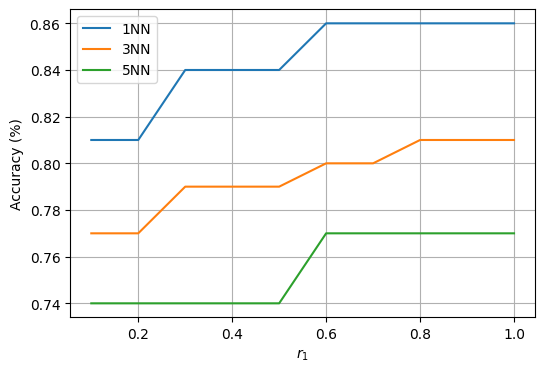

In [5]:
getSensitivityExperimentUnivariateResultK(
    sensitivity_link="../Results/Sensitivity/MLOT.txt",
    dataset="ERing"
)

### 2.1.2. Nonlinear Mask

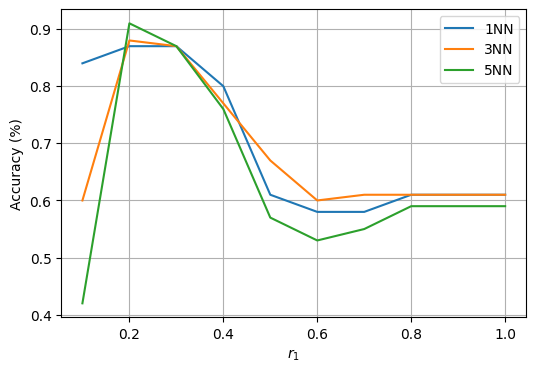

In [89]:
getSensitivityExperimentUnivariateResultK(
    sensitivity_link="../Results/Sensitivity/MNOT.txt",
    dataset="BME"
)

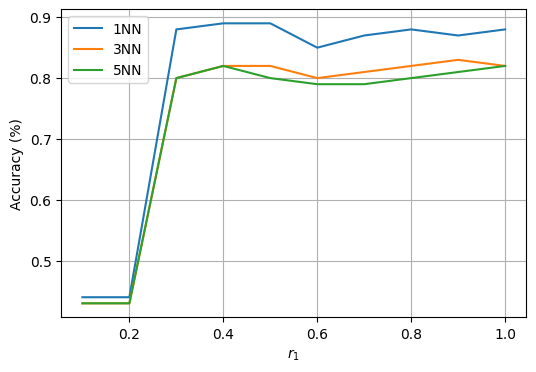

In [9]:
getSensitivityExperimentUnivariateResultK(
    sensitivity_link="../Results/Sensitivity/MNOT.txt",
    dataset="ERing"
    
)

## 2.2. MSOT

### 2.2.1. Linear Mask

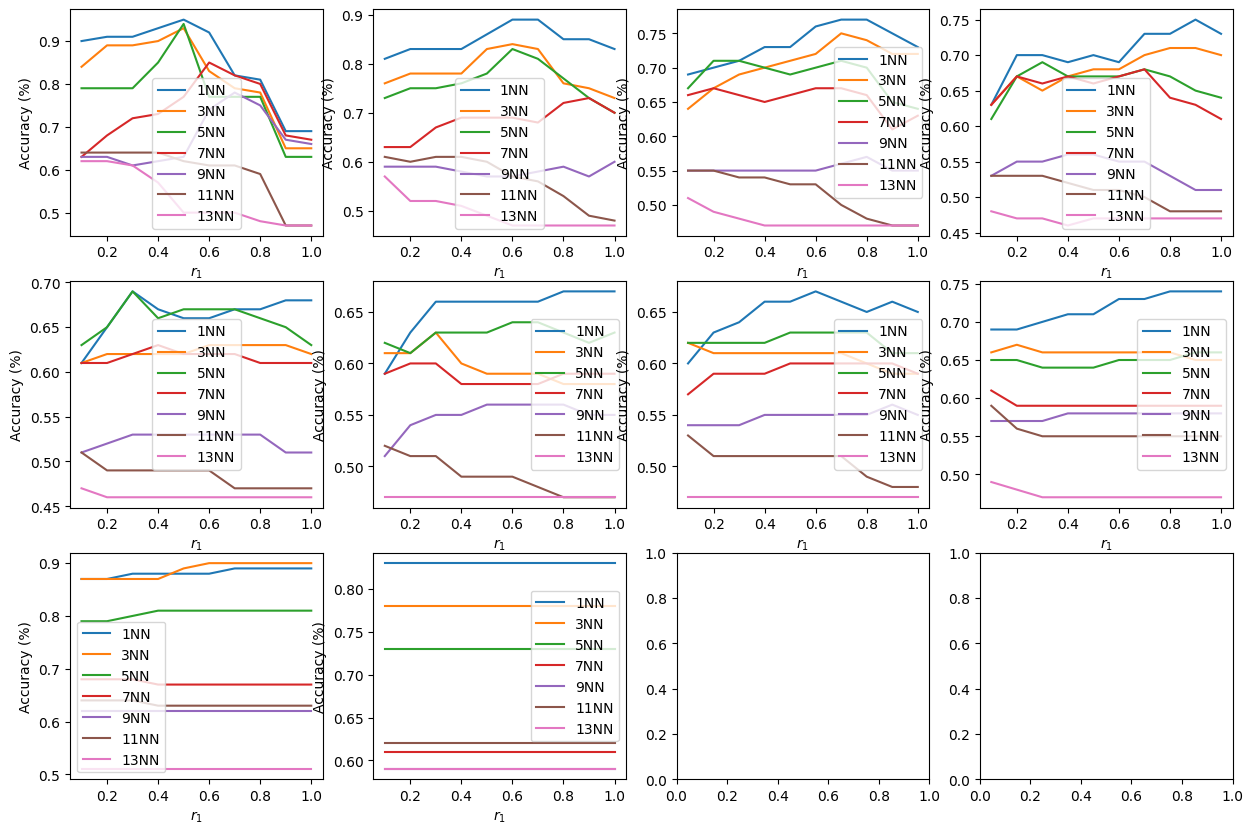

In [81]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MLSOT.txt", dataset="BME", ratio=False)

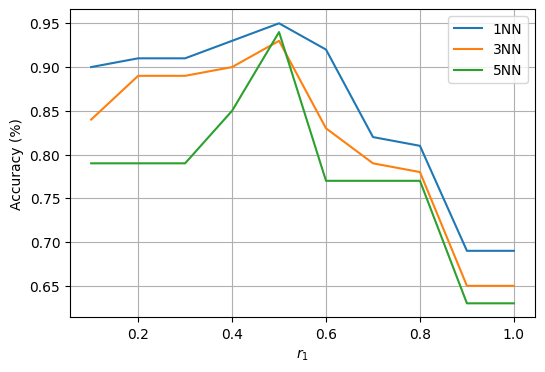

In [91]:
getSensitivityExperimentMultivariateResultK(
    ratio = 0, 
    value=0, 
    sensitivity_link="../Results/Sensitivity/MLSOT.txt", 
    dataset="BME", 
    multi_plot=False
)

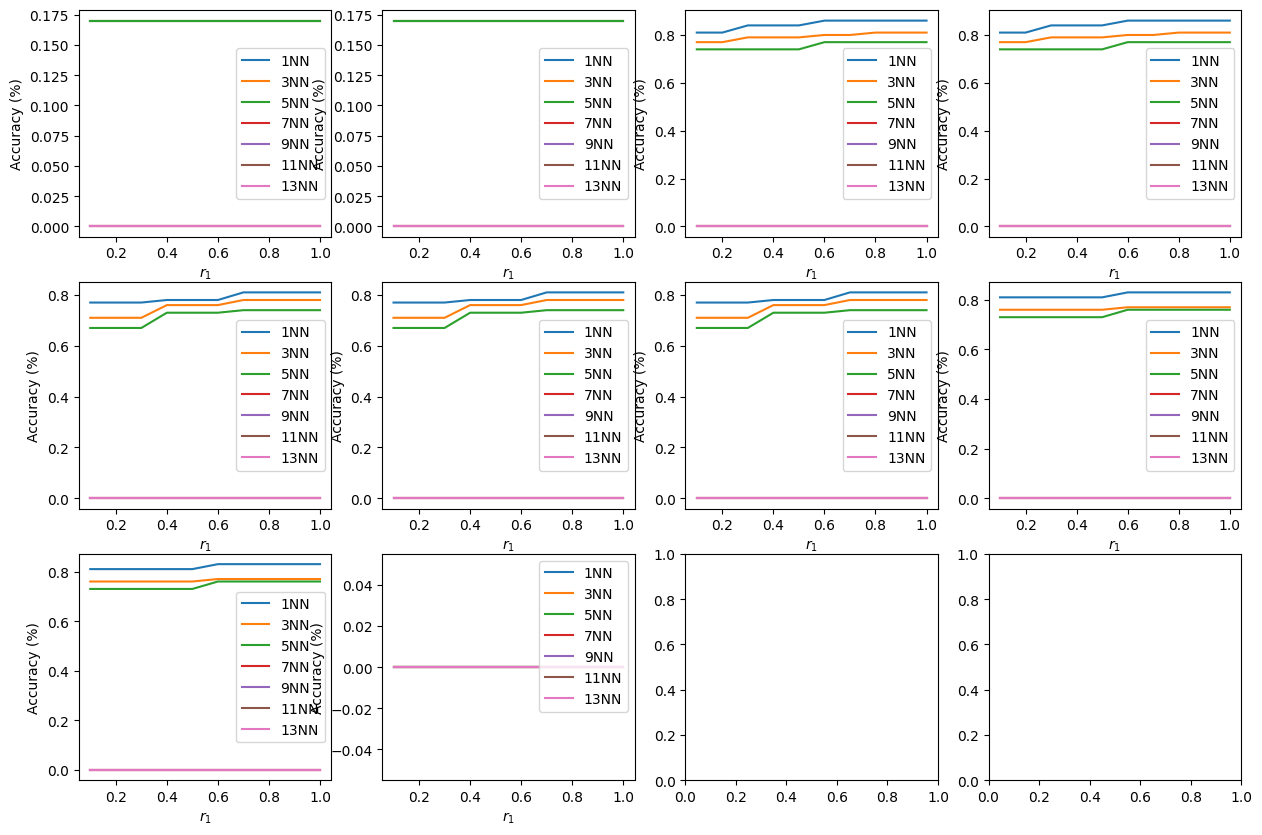

In [16]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MLSOT.txt", dataset="ERing", ratio=False)

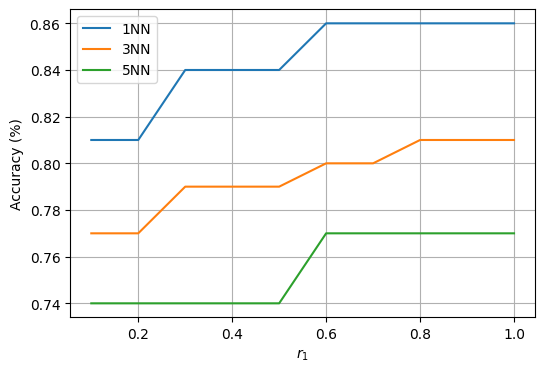

In [12]:
getSensitivityExperimentMultivariateResultK(
    ratio = 0, 
    value=3, 
    sensitivity_link="../Results/Sensitivity/MLSOT.txt", 
    dataset="ERing", 
    multi_plot=False
)

### 2.2.2. Nonlinear Mask

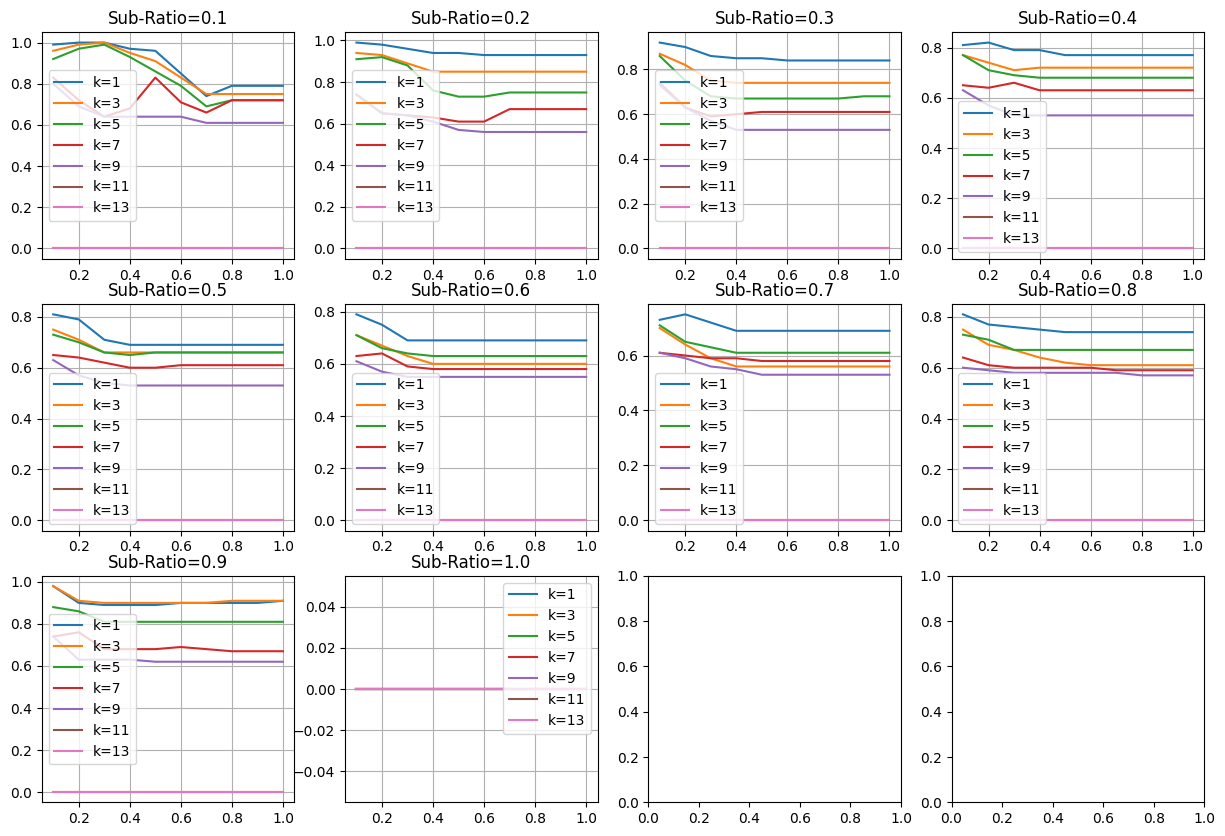

In [7]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MNSOT.txt", dataset="BME", ratio=False)

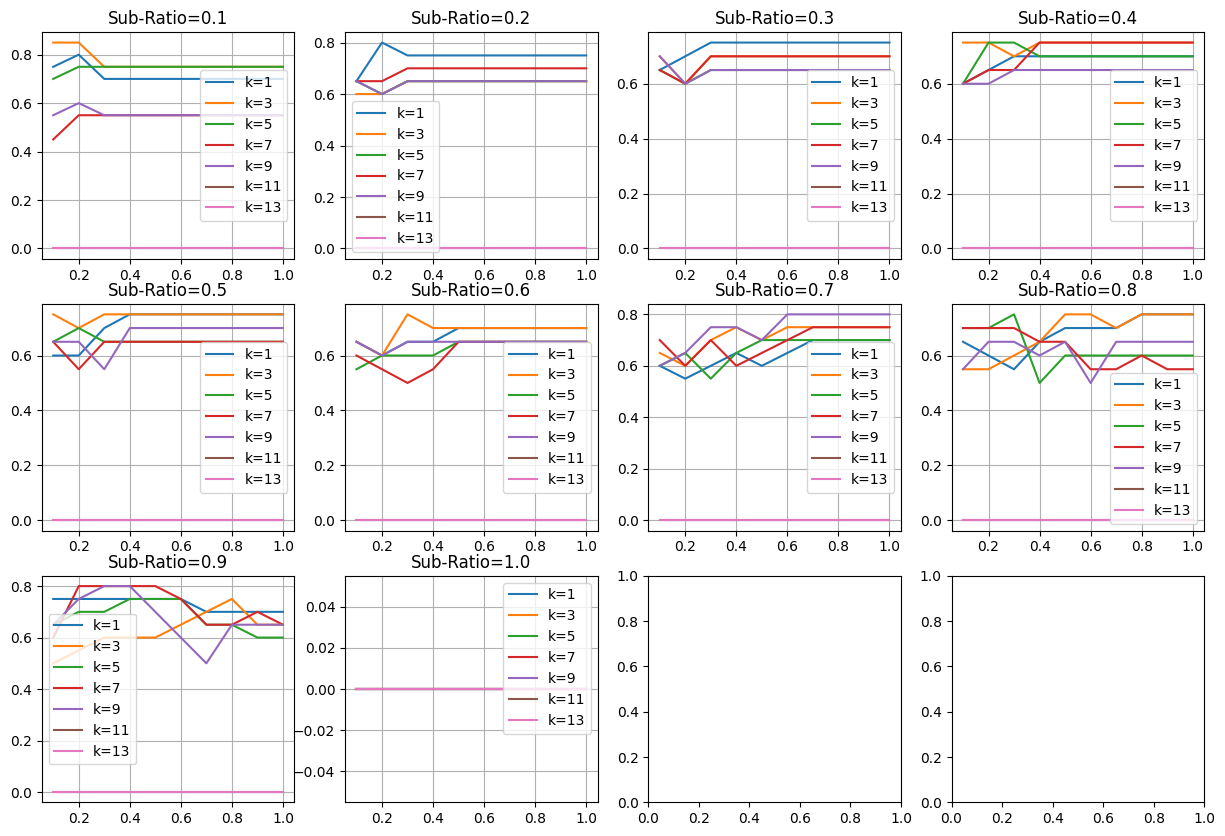

In [8]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MNSOT.txt", dataset="BeetleFly", ratio=False)

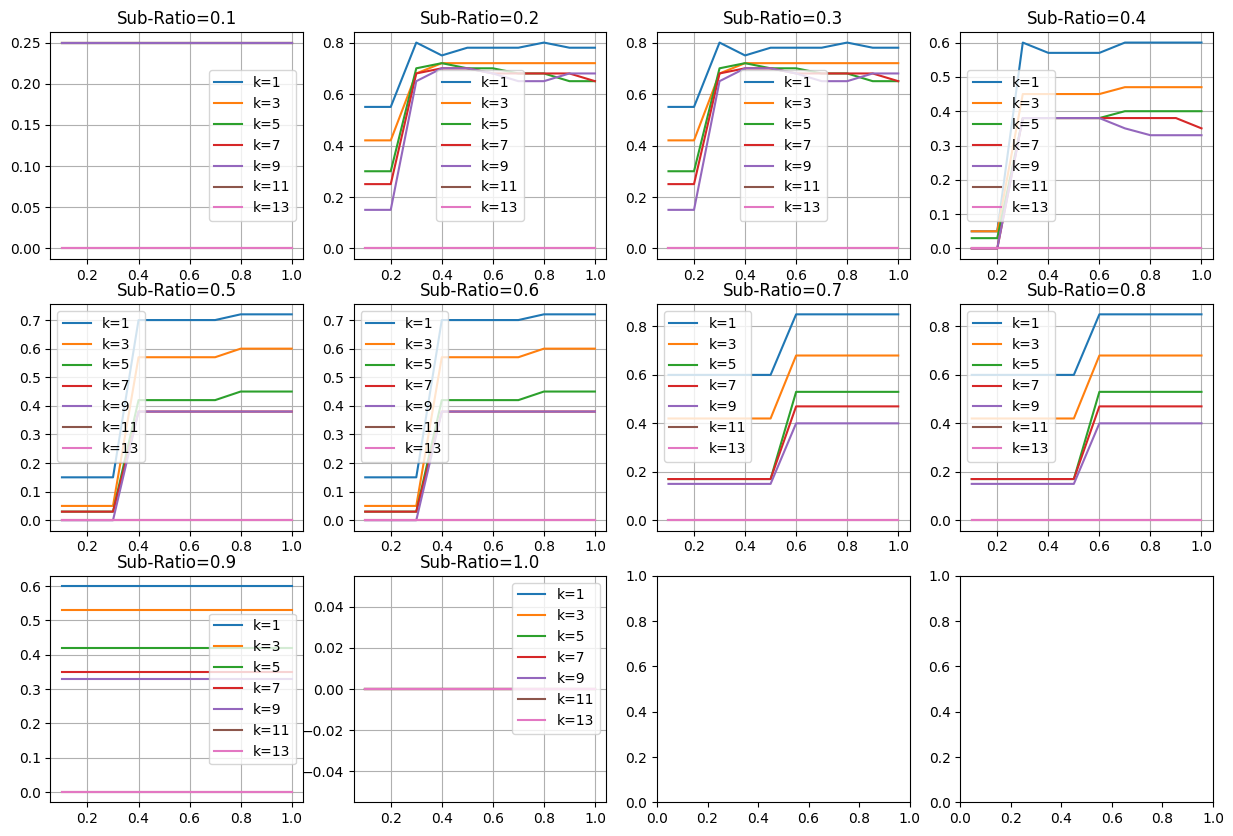

In [9]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MNSOT.txt", dataset="BasicMotions", ratio=False)

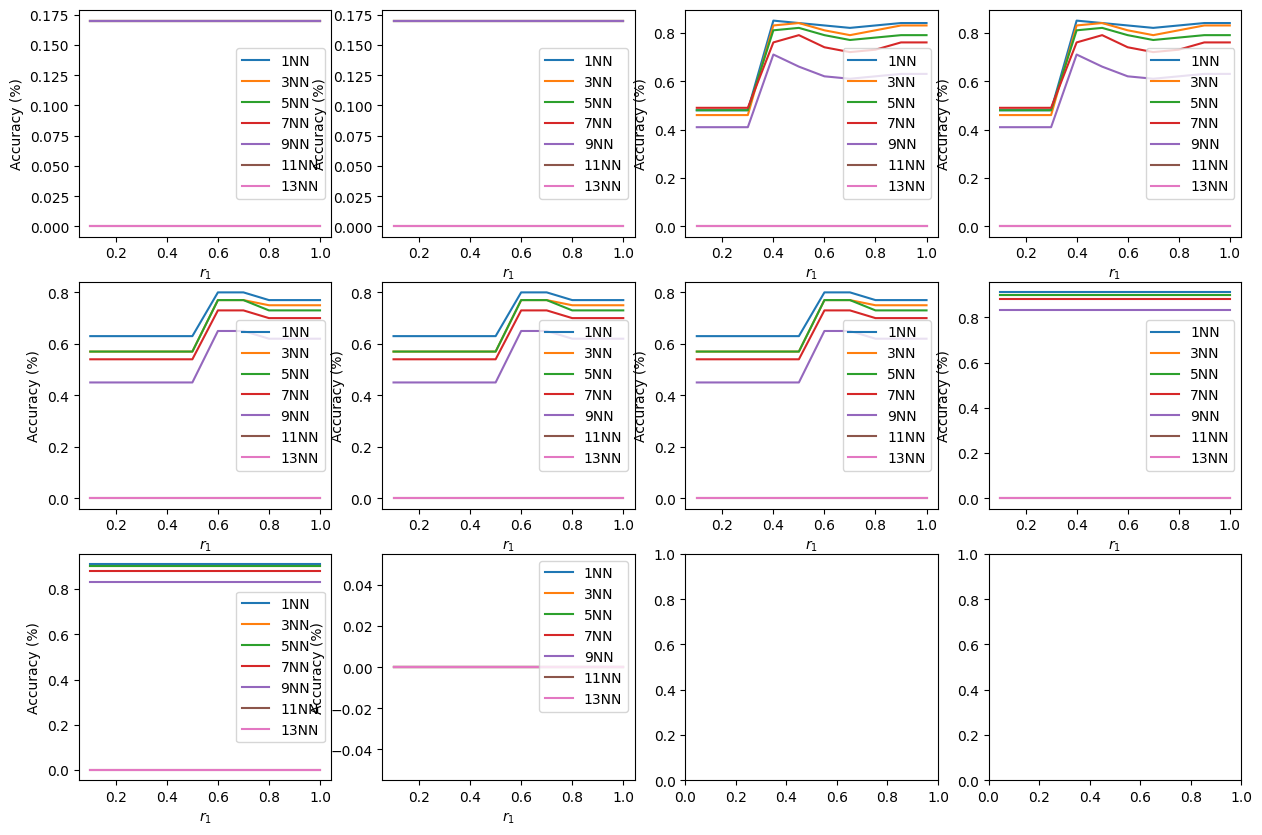

In [95]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MNSOT.txt", dataset="ERing", ratio=False)

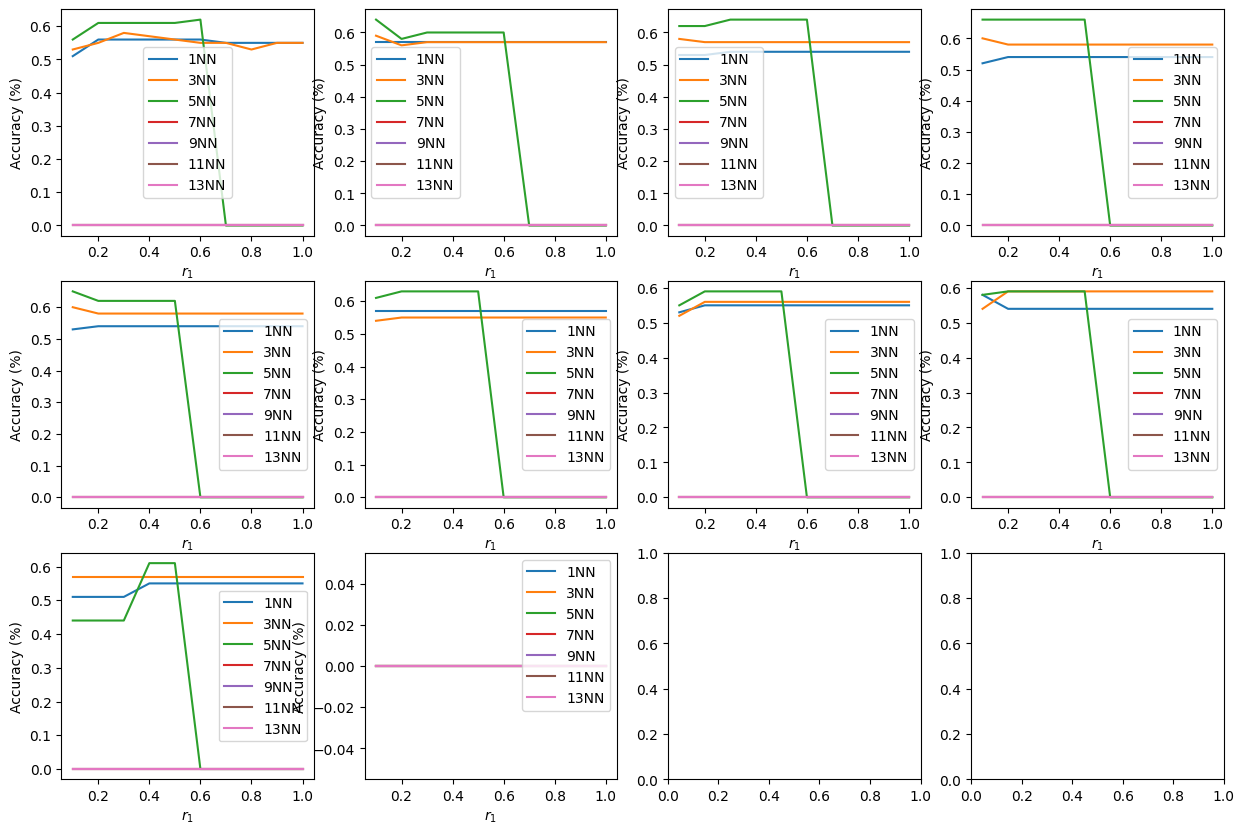

In [17]:
draw_multiple_sensitivity_matrices(sensitivity_link="../Results/Sensitivity/MNSOT.txt", dataset="FingerMovements", ratio=False)

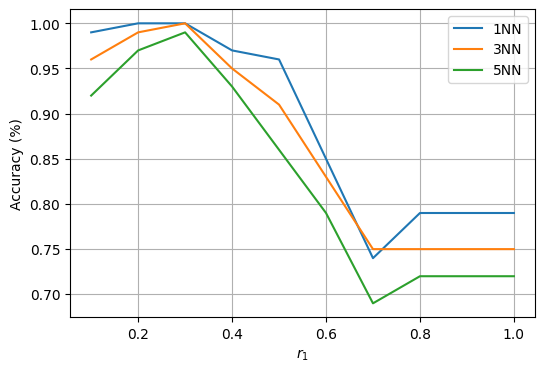

In [92]:
getSensitivityExperimentMultivariateResultK(
    ratio = 0, 
    value=0, 
    sensitivity_link="../Results/Sensitivity/MNSOT.txt", 
    dataset="BME", 
    multi_plot=False
)

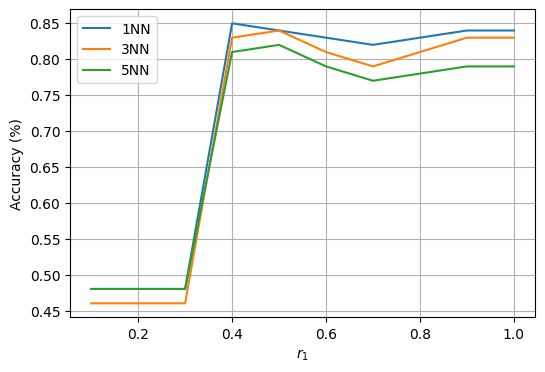

In [8]:
getSensitivityExperimentMultivariateResultK(
    ratio = 0, 
    value=3, 
    sensitivity_link="../Results/Sensitivity/MNSOT.txt", 
    dataset="ERing", 
    multi_plot=False
)